# Ball-and-Stick Models

The Ball-and-Stick Model combines elements of both point and cable models by representing the neuron as a spherical soma ("ball") attached to one or more cylindrical dendrites ("sticks"). While the passive cable model focuses exclusively on signal propagation along uniform cylindrical segments, the ball-and-stick model introduces the soma as a distinct compartment with different geometric and electrical properties. This hybrid approach allows for more realistic representation of neuronal morphology while maintaining computational tractability, capturing important phenomena like impedance matching between soma and dendrites and somatic shunting effects.

## Key Properties

1. **Morphological Realism**: Represents distinct soma and dendritic compartments with different properties
2. **Impedance Mismatch**: Captures the impedance boundary between soma and dendrites
3. **Somatic Shunting**: Models how the soma can act as a current sink for dendritic signals
4. **Directional Asymmetry**: Different signal propagation properties in soma-to-dendrite vs. dendrite-to-soma directions
5. **Branching Effects**: Can be extended to include multiple dendrites or branching patterns
6. **Input Integration**: Realistic spatial and temporal integration of inputs at different locations

## Mathematical Description

The ball-and-stick model combines the point-neuron equation for the soma with the cable equation for dendrites:

For the soma (ball):
Cm,s(dVs/dt) = -gL,s(Vs - EL) + Isyn + Iext - Σ(Id→s)

For each dendritic segment (stick):
λ²(∂²Vd/∂x²) = τm(∂Vd/∂t) + Vd - EL

With boundary conditions:
- At x=0 (soma-dendrite junction): continuity of voltage and conservation of current
- At x=L (dendrite end): typically sealed end (∂V/∂x = 0)

Parameters:
- Vs: Somatic membrane potential
- Vd(x,t): Dendritic membrane potential at position x and time t
- EL: Leak reversal potential (typically -70 mV)
- rm: Specific membrane resistance (typically 10,000-40,000 Ω·cm²)
- ri: Intracellular resistivity (typically 70-300 Ω·cm)
- cm: Specific membrane capacitance (typically 0.9-1.0 μF/cm²)
- ds: Soma diameter (typically 10-30 μm)
- dd: Dendrite diameter (typically 0.5-2 μm)
- L: Dendrite length (typically 50-500 μm)
- gL,s: Somatic leak conductance
- Cm,s: Somatic membrane capacitance
- λ = sqrt(rm·dd/(4·ri)): Dendritic length constant
- τm = rm·cm: Membrane time constant (typically 10-50 ms)
- Gc: Soma-dendrite coupling conductance
- Id→s: Current flowing from dendrite to soma
- Ra: Axial resistance between soma and dendrite

State Variables:
- Vs(t): Somatic membrane potential (initialize at EL)
- Vd(x,t): Dendritic membrane potential at each position x (initialize at EL)

Time and Space-related variables:
- dt: Time step for numerical integration
- dx: Spatial discretization step for dendrites
- t: Current simulation time
- tmax: Maximum simulation time
- X: Position along the dendrite (0 ≤ X ≤ L)

## Algorithm

1. Initialize state variables
   - Vs(0) = EL for soma
   - Vd(x,0) = EL for all positions x along dendrites
   - Set boundary and initial conditions

2. Spatial discretization
   - Divide dendrite into N segments of length dx
   - Create position vector X = [0, dx, 2dx, ..., L]

3. For each time step from t=0 to t=tmax:
   
   a. Update somatic potential
      - Calculate dendrite-to-soma currents for each dendrite at the junction (x=0)
      - Id→s = (Vd(0,t) - Vs(t))/Ra
      - Compute somatic voltage derivative:
        dVs/dt = (-gL,s(Vs - EL) + Isyn + Iext - Σ(Id→s))/Cm,s
      - Update soma potential: Vs(t+dt) = Vs(t) + dt·dVs/dt
   
   b. Apply soma-dendrite boundary condition at x=0
      - Vd(0,t+dt) = Vs(t+dt)  # Voltage continuity
   
   c. For each dendrite, for each interior position x:
      - Compute second spatial derivative using central difference:
        ∂²Vd/∂x² ≈ (Vd(x+dx,t) - 2Vd(x,t) + Vd(x-dx,t))/dx²
      
      - Compute temporal derivative:
        ∂Vd/∂t = (λ²∂²Vd/∂x² - (Vd - EL))/τm
   
      - Update dendritic potential: 
        Vd(x,t+dt) = Vd(x,t) + dt·∂Vd/∂t
   
   d. Apply dendrite end boundary condition at x=L
      - For sealed end: Vd(L,t+dt) = Vd(L-dx,t+dt)  # ∂V/∂x = 0
   
   e. Store variables for plotting
      - Record Vs(t) and Vd(x,t) at selected positions and times
   
   f. Increment time: t = t + dt

4. Analyze and visualize results
   - Plot somatic voltage vs time
   - Plot dendritic voltage vs position at different times
   - Plot voltage vs time at different dendritic positions
   - Calculate effective electrotonic length and signal attenuation
   - Analyze input integration properties

## Characteristic Behaviors

1. **Somatic Dominance**: Large somatic capacitance slows voltage changes at the soma
2. **Dendrite-to-Soma Attenuation**: Signals attenuate significantly when traveling from dendrites to soma
3. **Soma-to-Dendrite Spread**: Somatic voltage changes spread more effectively into proximal dendrites
4. **Location-Dependent Integration**: Synaptic inputs have different effects depending on their distance from soma
5. **Impedance Mismatching**: The soma-dendrite junction creates impedance mismatch affecting signal propagation
6. **Input Synchrony Sensitivity**: Synchronized inputs produce stronger somatic responses than asynchronous ones
7. **Dendritic Democracy**: Mechanisms that compensate for distance-dependent attenuation of inputs

## Biological Mechanisms Represented

The ball-and-stick model represents:
- Distinct electrical properties of soma and dendrites
- Current flow across the soma-dendrite junction
- Spatial filtering of inputs based on dendritic location
- Passive signal attenuation and delay
- Morphological effects on signal integration
- Impact of soma size relative to dendrite diameter
- Directional asymmetry in signal propagation

## Applications

The ball-and-stick model is particularly useful for:
- Studying how neuronal morphology affects signal processing
- Analyzing the functional consequences of soma size and dendrite properties
- Understanding location-dependent synaptic integration
- Investigating the impact of dendritic branching patterns
- Teaching fundamental concepts in computational neuroscience
- Serving as a building block for more complex multi-compartmental models
- Efficiently simulating small networks with morphologically realistic neurons
- Interpreting experimental recordings from soma and dendrites

In [12]:
# Add these imports at the top of your notebook if not already present
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Ball and Stick class definition
class BallAndStick:
    def __init__(self, 
                 # Soma parameters
                 soma_Cm=1.0,      # nF (membrane capacitance)
                 soma_R=10.0,      # MΩ (membrane resistance)
                 soma_V_th=-55.0,  # mV (threshold voltage)
                 soma_V_reset=-70.0, # mV (reset voltage)
                 soma_V_rest=-70.0,  # mV (resting voltage)
                 soma_radius=10.0,   # μm (soma radius)
                 
                 # Dendrite parameters
                 dend_length=200.0,  # μm (dendrite length)
                 dend_radius=1.0,    # μm (dendrite radius)
                 dend_compartments=10, # number of compartments
                 dend_Ra=100.0,     # Ω·cm (axial resistance)
                 dend_Rm=20000.0,   # Ω·cm² (specific membrane resistance)
                 dend_Cm=1.0,       # μF/cm² (specific membrane capacitance)
                 
                 # Input parameters
                 I_soma=0.0,        # nA (input to soma)
                 I_dend=None,       # nA (input to dendrite compartments)
                 input_loc=None,    # Location of dendrite input (compartment index)
                 
                 # Simulation parameters
                 time_steps=None):
        
        # Soma parameters
        self.soma_Cm = soma_Cm  
        self.soma_R = soma_R    
        self.soma_V_th = soma_V_th  
        self.soma_V_reset = soma_V_reset
        self.soma_V_rest = soma_V_rest
        self.soma_radius = soma_radius
        self.soma_tau = soma_R * soma_Cm  # Time constant
        self.I_soma = I_soma
        
        # Dendrite parameters
        self.dend_length = dend_length
        self.dend_radius = dend_radius
        self.dend_compartments = dend_compartments
        self.dend_dx = dend_length / dend_compartments  # μm (compartment length)
        self.dend_Ra = dend_Ra
        self.dend_Rm = dend_Rm
        self.dend_Cm = dend_Cm
        
        # Calculate dendrite parameters
        self.dend_area = 2 * np.pi * dend_radius * self.dend_dx  # μm² (surface area per compartment)
        self.dend_cross_area = np.pi * dend_radius**2  # μm² (cross-sectional area)
        self.dend_ri = dend_Ra * self.dend_dx / self.dend_cross_area  # MΩ (axial resistance per compartment)
        self.dend_rm = dend_Rm / self.dend_area  # MΩ (membrane resistance per compartment)
        self.dend_cm = dend_Cm * self.dend_area / 1000  # nF (membrane capacitance per compartment)
        self.dend_tau = self.dend_rm * self.dend_cm  # ms (membrane time constant)
        
        # Input to dendrite
        if I_dend is None:
            self.I_dend = np.zeros(dend_compartments)
        else:
            self.I_dend = I_dend
            
        self.input_loc = input_loc
        
        # Simulation parameters
        self.time_steps = time_steps
        if time_steps is not None:
            self.dt = time_steps[1] - time_steps[0]  # ms (time step)
        
    def simulate(self):
        dt = self.dt
        n_time = len(self.time_steps)
        
        # Initialize arrays for storing voltages and spike times
        soma_V = np.zeros(n_time)
        soma_V[0] = self.soma_V_rest
        dend_V = np.zeros((self.dend_compartments, n_time))
        dend_V[:, 0] = self.soma_V_rest  # Start all compartments at resting
        spikes = []
        
        # Simulation
        for t_idx in range(1, n_time):
            # Apply input current to dendrite if specified
            if self.input_loc is not None:
                current_t_idx = min(t_idx, len(self.I_dend)-1) if isinstance(self.I_dend, np.ndarray) else 0
                dend_V[self.input_loc, t_idx-1] += self.I_dend[current_t_idx] * self.dend_rm if isinstance(self.I_dend, np.ndarray) else self.I_dend * self.dend_rm
            
            # Update dendrite compartments
            for i in range(self.dend_compartments):
                # Calculate current coming from adjacent compartments
                I_adjacent = 0
                if i > 0:  # Current from previous compartment
                    I_adjacent += (dend_V[i-1, t_idx-1] - dend_V[i, t_idx-1]) / self.dend_ri
                if i < self.dend_compartments - 1:  # Current from next compartment
                    I_adjacent += (dend_V[i+1, t_idx-1] - dend_V[i, t_idx-1]) / self.dend_ri
                
                # Add current from soma for the first compartment
                if i == 0:
                    I_adjacent += (soma_V[t_idx-1] - dend_V[i, t_idx-1]) / self.dend_ri
                
                # Leak current
                I_leak = (self.soma_V_rest - dend_V[i, t_idx-1]) / self.dend_rm
                
                # Update voltage
                dV = (I_adjacent + I_leak) * dt / self.dend_cm
                dend_V[i, t_idx] = dend_V[i, t_idx-1] + dV
            
            # Update soma
            # Calculate current from the first dendrite compartment
            I_dend_to_soma = (dend_V[0, t_idx-1] - soma_V[t_idx-1]) / self.dend_ri
            
            # Update soma voltage (using LIF dynamics)
            V_inf = (self.I_soma + I_dend_to_soma) * self.soma_R + self.soma_V_rest
            soma_V[t_idx] = V_inf + (soma_V[t_idx-1] - V_inf) * np.exp(-dt / self.soma_tau)
            
            # Check for spike
            if soma_V[t_idx] >= self.soma_V_th:
                spikes.append(self.time_steps[t_idx])
                soma_V[t_idx] = self.soma_V_reset
        
        return soma_V, dend_V, spikes
    
    def plot_results(self, soma_V, dend_V, spikes):
        fig = plt.figure(figsize=(15, 10))
        
        # Plot 1: Soma and dendrite voltage traces
        ax1 = fig.add_subplot(2, 1, 1)
        ax1.plot(self.time_steps, soma_V, 'k', label='Soma')
        
        # Plot dendrite traces with color gradient
        cmap = plt.cm.viridis
        colors = [cmap(i) for i in np.linspace(0, 1, self.dend_compartments)]
        
        for i in range(0, self.dend_compartments, max(1, self.dend_compartments//5)):
            ax1.plot(self.time_steps, dend_V[i], color=colors[i], 
                    label=f'Dendrite {i*self.dend_dx:.0f}μm')
        
        # Plot threshold and reset lines
        ax1.axhline(y=self.soma_V_th, color='r', linestyle='--', alpha=0.7, label='Threshold')
        ax1.axhline(y=self.soma_V_reset, color='g', linestyle='--', alpha=0.7, label='Reset')
        
        # Plot spikes as vertical lines
        for spike in spikes:
            ax1.axvline(x=spike, color='r', linestyle='-', alpha=0.5)
        
        ax1.set_xlabel('Time (ms)')
        ax1.set_ylabel('Membrane Potential (mV)')
        ax1.set_title('Ball-and-Stick Model: Voltage Traces')
        ax1.legend(loc='upper right')
        ax1.grid(True)
        
        # Plot 2: Spatiotemporal voltage distribution as a heatmap
        ax2 = fig.add_subplot(2, 1, 2)
        extent = [0, self.time_steps[-1], 0, self.dend_length]
        im = ax2.imshow(dend_V, aspect='auto', origin='lower', extent=extent, 
                        cmap='viridis', interpolation='nearest')
        
        ax2.set_xlabel('Time (ms)')
        ax2.set_ylabel('Position along dendrite (μm)')
        ax2.set_title('Spatiotemporal Voltage Distribution')
        
        cbar = plt.colorbar(im, ax=ax2)
        cbar.set_label('Membrane Potential (mV)')
        
        plt.tight_layout()
        plt.show()
    
    def animate_voltage(self, soma_V, dend_V, save_path=None):
        """Create animation of voltage propagation along the neuron"""
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        
        # Calculate positions
        soma_pos = np.array([0, 0, 0])
        dend_positions = np.array([[x, 0, 0] for x in np.linspace(self.soma_radius, 
                                                               self.soma_radius + self.dend_length, 
                                                               self.dend_compartments)])
        
        # Normalize voltages for color mapping
        v_min = min(np.min(soma_V), np.min(dend_V))
        v_max = max(np.max(soma_V), np.max(dend_V))
        norm = plt.Normalize(v_min, v_max)
        cmap = plt.cm.plasma
        
        # Draw static neuron structure
        # Soma
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = self.soma_radius * np.cos(u) * np.sin(v)
        y = self.soma_radius * np.sin(u) * np.sin(v)
        z = self.soma_radius * np.cos(v)
        
        # Create plot elements that will be updated
        soma_surf = ax.plot_surface(x, y, z, color='gray', alpha=0.3)
        dend_line, = ax.plot([], [], [], 'o-', markersize=self.dend_radius*2, linewidth=self.dend_radius*2)
        
        # Set axis limits
        ax.set_xlim(-self.soma_radius, self.soma_radius + self.dend_length)
        ax.set_ylim(-self.soma_radius, self.soma_radius)
        ax.set_zlim(-self.soma_radius, self.soma_radius)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Ball-and-Stick Neuron: Voltage Propagation')
        
        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Membrane Potential (mV)')
        
        def update(frame):
            # Update soma color
            soma_color = cmap(norm(soma_V[frame]))
            ax.collections.remove(soma_surf)
            soma_surf_new = ax.plot_surface(x, y, z, color=soma_color, alpha=0.7)
            
            # Update dendrite colors
            dend_colors = [cmap(norm(v)) for v in dend_V[:, frame]]
            dend_line.set_data(dend_positions[:, 0], dend_positions[:, 1])
            dend_line.set_3d_properties(dend_positions[:, 2])
            dend_line.set_color(dend_colors)
            
            ax.set_title(f'Time: {self.time_steps[frame]:.1f} ms')
            return soma_surf_new, dend_line
        
        # Create animation
        frames = min(len(self.time_steps), 200)  # Limit frames for performance
        skip = max(1, len(self.time_steps) // frames)
        ani = FuncAnimation(fig, update, frames=range(0, len(self.time_steps), skip), 
                           blit=False, interval=50)
        
        if save_path:
            ani.save(save_path, writer='pillow', fps=20)
        
        plt.tight_layout()
        plt.show()
        
        return ani

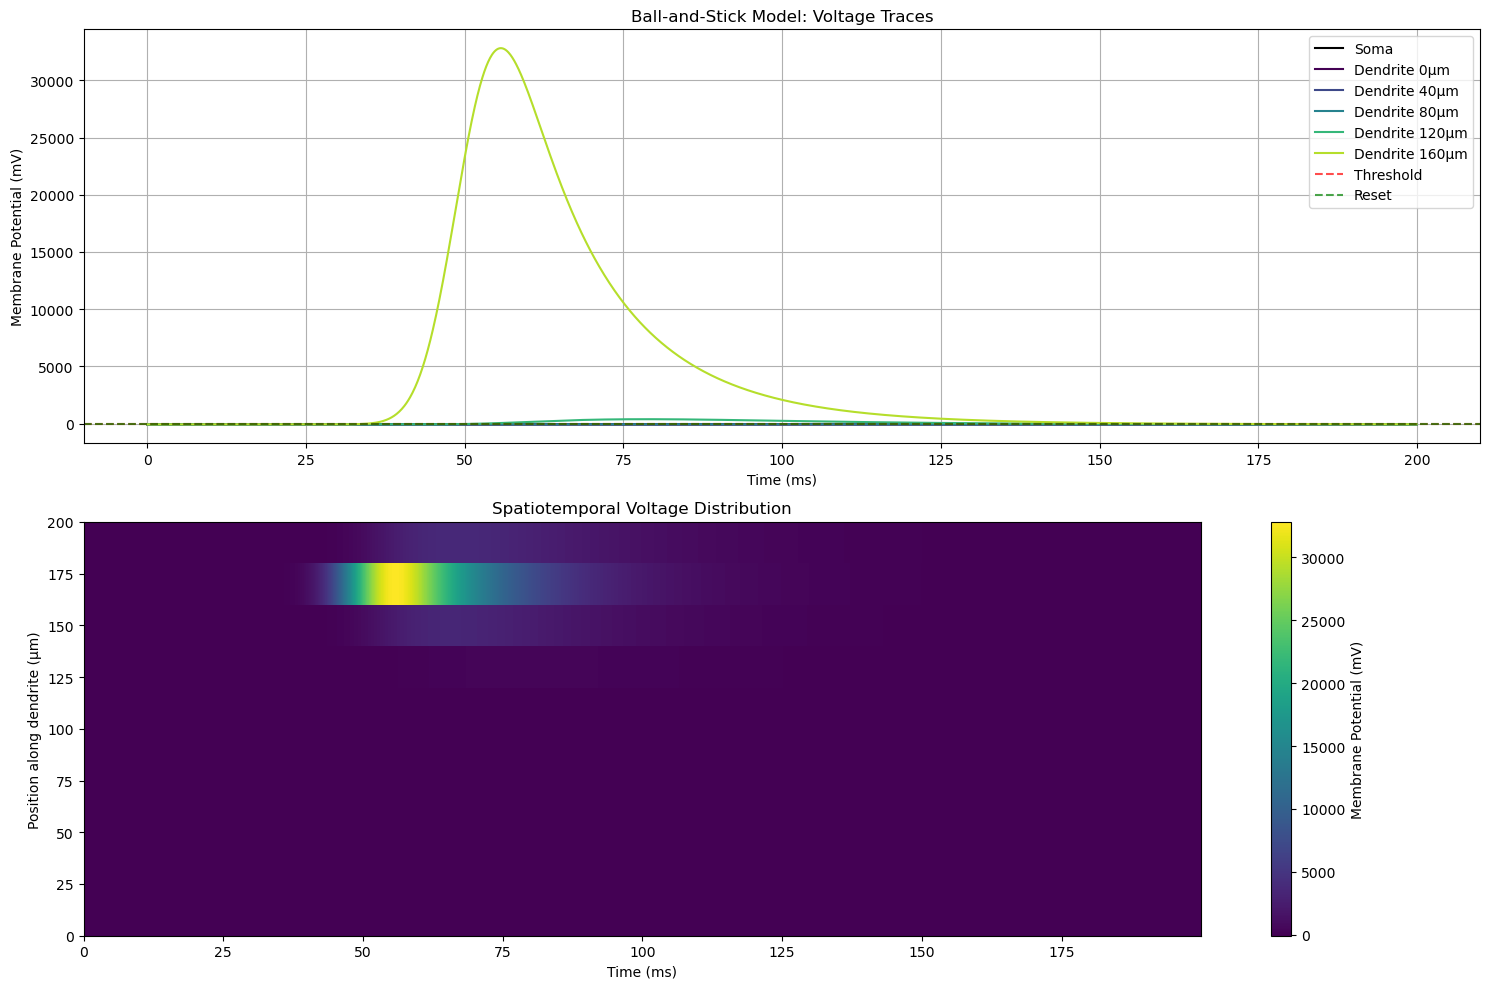

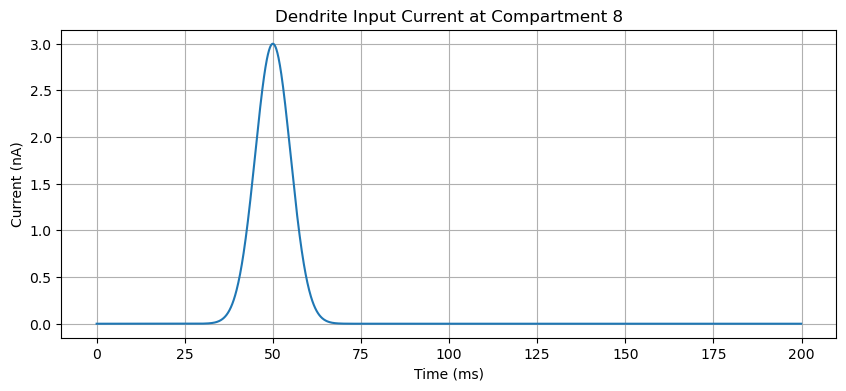

In [13]:
# Create time array
t_max = 200  # ms
dt = 0.1     # ms
time_steps = np.arange(0, t_max, dt)

# Create input current
# 1. Constant current to the soma
I_soma = 1.5  # nA

# 2. Synaptic input at distal dendrite (Gaussian pulse)
def gaussian_pulse(t, amplitude=3.0, center=50, width=5):
    return amplitude * np.exp(-((t - center) ** 2) / (2 * width ** 2))

I_dend = np.array([gaussian_pulse(t) for t in time_steps])
input_loc = 8  # Distal dendrite compartment (0-indexed)

# Create neuron model
neuron = BallAndStick(
    # Soma parameters
    soma_Cm=1.0,       # nF
    soma_R=10.0,       # MΩ
    soma_V_th=-55.0,   # mV
    soma_V_reset=-70.0, # mV
    soma_V_rest=-70.0,  # mV
    soma_radius=10.0,   # μm
    
    # Dendrite parameters
    dend_length=200.0,  # μm
    dend_radius=1.0,    # μm
    dend_compartments=10,
    
    # Input parameters
    I_soma=I_soma,      # Constant current to soma
    I_dend=I_dend,      # Current to dendrite
    input_loc=input_loc, # Location of dendrite input
    
    # Simulation parameters
    time_steps=time_steps
)

# Run simulation
soma_V, dend_V, spikes = neuron.simulate()

# Plot results
neuron.plot_results(soma_V, dend_V, spikes)

# Plot input current
plt.figure(figsize=(10, 4))
plt.plot(time_steps, I_dend)
plt.title(f'Dendrite Input Current at Compartment {input_loc}')
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.grid(True)
plt.show()